In [38]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from numpy.polynomial import Polynomial
from pandas.core.common import SettingWithCopyWarning

In [39]:
df_bp_energy = pd.read_csv('/content/bp.csv')

In [40]:
df_bp_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 95 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                6629 non-null   object 
 1   Year                   6629 non-null   int64  
 2   pop                    6603 non-null   float64
 3   ISO3166_alpha3         5763 non-null   object 
 4   ISO3166_numeric        5763 non-null   float64
 5   Region                 5763 non-null   object 
 6   SubRegion              5763 non-null   object 
 7   OPEC                   5763 non-null   float64
 8   EU                     5763 non-null   float64
 9   OECD                   5763 non-null   float64
 10  CIS                    5763 non-null   float64
 11  biodiesel_cons_kbd     310 non-null    float64
 12  biodiesel_cons_kboed   310 non-null    float64
 13  biodiesel_cons_ktoe    310 non-null    float64
 14  biodiesel_cons_pj      310 non-null    float64
 15  biod

In [41]:
df_bp_energy.head(5)

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,biodiesel_cons_kbd,biodiesel_cons_kboed,biodiesel_cons_ktoe,biodiesel_cons_pj,biodiesel_prod_kbd,biodiesel_prod_kboed,biodiesel_prod_ktoe,biodiesel_prod_pj,biofuels_cons_ej,biofuels_cons_kbd,biofuels_cons_kboed,biofuels_cons_ktoe,biofuels_cons_mtoe,biofuels_cons_pj,biofuels_prod_kbd,biofuels_prod_kboed,biofuels_prod_ktoe,biofuels_prod_pj,biogeo_ej,biogeo_mtoe,biogeo_twh,co2_mtco2,coalcons_ej,coalcons_mtoe,coalprod_ej,coalprod_mt,coalprod_mtoe,cobalt_kt,elect_twh,...,gasprod_bcfd,gasprod_bcm,gasprod_ej,gasprod_mtoe,gasreserves_tcm,graphite_kt,hydro_ej,hydro_mtoe,hydro_twh,liqcons_kbd,lithium_kt,nuclear_ej,nuclear_mtoe,nuclear_twh,oilcons_ej,oilcons_kbd,oilcons_mt,oilcons_mtoe,oilprod_crudecond_kbd,oilprod_kbd,oilprod_mt,oilprod_ngl_kbd,oilreserves_bbl,primary_ej,primary_gj_pc,primary_mtoe,rareearths_kt,refcap_kbd,refthru_kbd,ren_power_ej,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,solar_ej,solar_mtoe,solar_twh,wind_ej,wind_mtoe,wind_twh
0,Algeria,1965,12.550880,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,5.568753,0.002931,0.070,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00400,0.095538,0.400,26.716192,NaN,0.0,0.0,0.0,0.055459,26.716192,1.289,1.324613,NaN,569.943836,26.139312,NaN,NaN,0.089139,7.102248,2.129060,NaN,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Algeria,1966,12.902626,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.867506,0.002847,0.068,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00355,0.084790,0.355,35.353233,NaN,0.0,0.0,0.0,0.072982,35.353233,1.693,1.743139,NaN,733.593151,33.642476,NaN,NaN,0.107168,8.305911,2.559665,NaN,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algeria,1967,13.275020,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.369307,0.002177,0.052,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00410,0.097927,0.410,33.285973,NaN,0.0,0.0,0.0,0.068191,33.285973,1.578,1.628722,NaN,842.664384,38.645242,NaN,NaN,0.101426,7.640376,2.422522,NaN,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Algeria,1968,13.663581,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,6.771137,0.002303,0.055,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00563,0.134470,0.563,35.374426,NaN,0.0,0.0,0.0,0.072602,35.374426,1.682,1.734076,NaN,922.495082,42.423748,NaN,NaN,0.108879,7.968535,2.600524,NaN,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Algeria,1969,14.061724,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,7.592118,0.002931,0.070,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00361,0.086223,0.361,37.714329,NaN,0.0,0.0,0.0,0.076701,37.714329,1.775,1.831980,NaN,969.331507,44.435793,NaN,NaN,0.120508,8.569944,2.878289,NaN,54.221918,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_bp_energy.tail()

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,biodiesel_cons_kbd,biodiesel_cons_kboed,biodiesel_cons_ktoe,biodiesel_cons_pj,biodiesel_prod_kbd,biodiesel_prod_kboed,biodiesel_prod_ktoe,biodiesel_prod_pj,biofuels_cons_ej,biofuels_cons_kbd,biofuels_cons_kboed,biofuels_cons_ktoe,biofuels_cons_mtoe,biofuels_cons_pj,biofuels_prod_kbd,biofuels_prod_kboed,biofuels_prod_ktoe,biofuels_prod_pj,biogeo_ej,biogeo_mtoe,biogeo_twh,co2_mtco2,coalcons_ej,coalcons_mtoe,coalprod_ej,coalprod_mt,coalprod_mtoe,cobalt_kt,elect_twh,...,gasprod_bcfd,gasprod_bcm,gasprod_ej,gasprod_mtoe,gasreserves_tcm,graphite_kt,hydro_ej,hydro_mtoe,hydro_twh,liqcons_kbd,lithium_kt,nuclear_ej,nuclear_mtoe,nuclear_twh,oilcons_ej,oilcons_kbd,oilcons_mt,oilcons_mtoe,oilprod_crudecond_kbd,oilprod_kbd,oilprod_mt,oilprod_ngl_kbd,oilreserves_bbl,primary_ej,primary_gj_pc,primary_mtoe,rareearths_kt,refcap_kbd,refthru_kbd,ren_power_ej,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,solar_ej,solar_mtoe,solar_twh,wind_ej,wind_mtoe,wind_twh
6624,Zimbabwe,2016,14.030338,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072937,2.701719,1.742068,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6625,Zimbabwe,2017,14.236599,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079046,2.928000,1.887974,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6626,Zimbabwe,2018,14.438812,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090378,3.347764,2.158638,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6627,Zimbabwe,2019,14.645473,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070920,2.627011,1.693897,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6628,Zimbabwe,2020,14.862927,ZWE,716.0,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088550,3.280062,2.114984,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_bp_energy_cleaned = df_bp_energy.copy()
df_bp_energy_cleaned.drop(df_bp_energy_cleaned.iloc[:, 11:32], inplace = True, axis = 1)
df_bp_energy_cleaned.drop(df_bp_energy_cleaned.iloc[:, 12:63], inplace = True, axis = 1)
df_bp_energy_cleaned.drop(df_bp_energy_cleaned.iloc[:, 17:23], inplace = True, axis = 1)
df_bp_energy_cleaned['co2_mtco2_ej']=df_bp_energy_cleaned.apply(lambda x: x['co2_mtco2']*0.9324,axis=1)
df_bp_energy_cleaned['ren_power_pro_ej']=df_bp_energy.apply(lambda x: x['ren_power_twh']*0.0036,axis=1) #produced renewable energy amount converted from twh to ej
df_bp_energy_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6629 entries, 0 to 6628
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6629 non-null   object 
 1   Year              6629 non-null   int64  
 2   pop               6603 non-null   float64
 3   ISO3166_alpha3    5763 non-null   object 
 4   ISO3166_numeric   5763 non-null   float64
 5   Region            5763 non-null   object 
 6   SubRegion         5763 non-null   object 
 7   OPEC              5763 non-null   float64
 8   EU                5763 non-null   float64
 9   OECD              5763 non-null   float64
 10  CIS               5763 non-null   float64
 11  co2_mtco2         5003 non-null   float64
 12  ren_power_ej      5003 non-null   float64
 13  ren_power_mtoe    5003 non-null   float64
 14  ren_power_twh     5003 non-null   float64
 15  renewables_ej     5003 non-null   float64
 16  renewables_mtoe   5003 non-null   float64


In [44]:
grouped = df_bp_energy_cleaned.groupby("Region").count()
grouped['Country']

Region
Africa                 902
Asia Pacific          1160
CIS                    392
Europe                1888
Middle East            616
North America          168
S. & Cent. America     637
Name: Country, dtype: int64

In [45]:
year2020=df_bp_energy_cleaned[df_bp_energy_cleaned['Year']==2020]
year2020

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,co2_mtco2,ren_power_ej,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,co2_mtco2_ej,ren_power_pro_ej
55,Algeria,2020,43.851043,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,148.565244,0.005400,0.128978,0.608000,0.005400,0.128978,138.522234,0.002189
111,Angola,2020,32.866268,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Argentina,2020,45.195777,ARG,32.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,164.133062,0.099728,2.381965,11.228580,0.134454,3.211370,153.037667,0.040423
223,Australia,2020,25.499881,AUS,36.0,Asia Pacific,Asia Pacific,0.0,0.0,1.0,0.0,372.277697,0.442838,10.577004,49.859977,0.448609,10.714830,347.111725,0.179496
279,Austria,2020,9.006400,AUT,40.0,Europe,Europe,0.0,1.0,1.0,0.0,55.274947,0.121134,2.893232,13.638690,0.139821,3.339567,51.538361,0.049099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6450,Venezuela,2020,28.435943,VEN,862.0,S. & Cent. America,South America,1.0,0.0,0.0,0.0,88.471222,0.000112,0.002667,0.012571,0.000112,0.002667,82.490567,0.000045
6506,Vietnam,2020,97.338583,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,283.931719,0.083966,2.005499,9.453920,0.083966,2.005499,264.737935,0.034034
6562,Yemen,2020,29.825968,YEM,887.0,Middle East,Middle East,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6588,Zambia,2020,18.383956,ZMB,894.0,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
year2019=df_bp_energy_cleaned[df_bp_energy_cleaned['Year']==2019]
year2019

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,co2_mtco2,ren_power_ej,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,co2_mtco2_ej,ren_power_pro_ej
54,Algeria,2019,43.053054,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,160.897465,0.005571,0.133073,0.625000,0.005571,0.133073,150.020797,0.002250
110,Angola,2019,31.825299,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Argentina,2019,44.780675,ARG,32.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,175.817913,0.057218,1.366626,6.418609,0.121910,2.911779,163.932622,0.023107
222,Australia,2019,25.203200,AUS,36.0,Asia Pacific,Asia Pacific,0.0,0.0,1.0,0.0,400.973315,0.367597,8.779902,41.236401,0.373218,8.914164,373.867519,0.148451
278,Austria,2019,8.955108,AUT,40.0,Europe,Europe,0.0,1.0,1.0,0.0,63.719064,0.124131,2.964810,13.924767,0.145196,3.467959,59.411655,0.050129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,Venezuela,2019,28.515829,VEN,862.0,S. & Cent. America,South America,1.0,0.0,0.0,0.0,112.310920,0.000112,0.002677,0.012571,0.000112,0.002677,104.718702,0.000045
6505,Vietnam,2019,96.462108,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,292.073219,0.036710,0.876813,4.118112,0.036710,0.876813,272.329070,0.014825
6561,Yemen,2019,29.161922,YEM,887.0,Middle East,Middle East,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6587,Zambia,2019,17.861034,ZMB,894.0,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
year2018=df_bp_energy_cleaned[df_bp_energy_cleaned['Year']==2018]
year2018

,Country,Year,pop,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,co2_mtco2,ren_power_ej,ren_power_mtoe,ren_power_twh,renewables_ej,renewables_mtoe,co2_mtco2_ej,ren_power_pro_ej
53,Algeria,2018,42.228415,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,156.675251,0.005485,0.131001,0.613000,0.005485,0.131001,146.084004,0.002207
109,Angola,2018,30.809787,AGO,24.0,Africa,Middle Africa,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,Argentina,2018,44.361150,ARG,32.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,187.460685,0.017840,0.426101,1.993883,0.081179,1.938928,174.788343,0.007178
221,Australia,2018,24.898153,AUS,36.0,Asia Pacific,Asia Pacific,0.0,0.0,1.0,0.0,396.635345,0.287950,6.877568,32.182648,0.293996,7.021964,369.822795,0.115858
277,Austria,2018,8.891383,AUT,40.0,Europe,Europe,0.0,1.0,1.0,0.0,62.160477,0.111088,2.653300,12.415757,0.132031,3.153495,57.958429,0.044697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,Venezuela,2018,28.887117,VEN,862.0,S. & Cent. America,South America,1.0,0.0,0.0,0.0,138.293447,0.000085,0.002020,0.009452,0.000085,0.002020,128.944810,0.000034
6504,Vietnam,2018,95.545959,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,240.981486,0.004475,0.106891,0.500180,0.004475,0.106891,224.691138,0.001801
6560,Yemen,2018,28.498683,YEM,887.0,Middle East,Middle East,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6586,Zambia,2018,17.351714,ZMB,894.0,Africa,Eastern Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


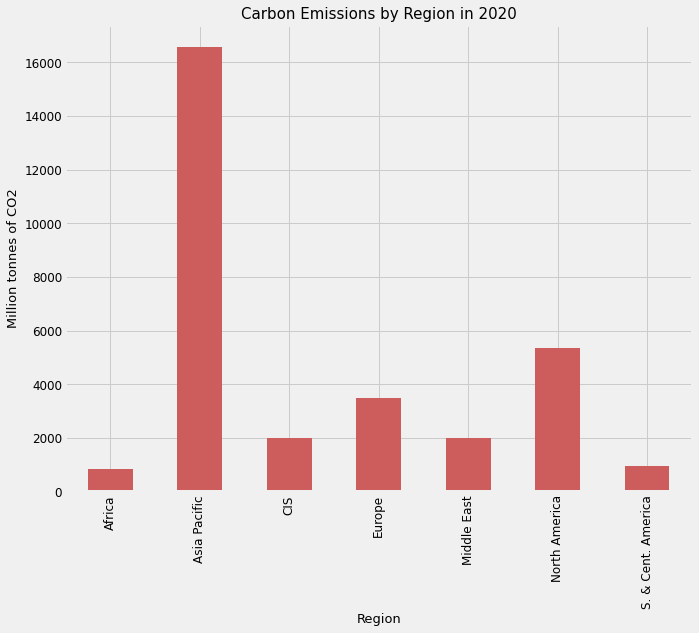

In [48]:
year2020RegionEmmission=year2020.groupby('Region')
Region_co2=year2020RegionEmmission['co2_mtco2'].sum()
Region_co2.plot(kind='bar',figsize=(10,8),fontsize=12,color="IndianRed");
plt.ylabel('Million tonnes of CO2',fontsize=13);
plt.xlabel('Region',fontsize=13)
plt.title('Carbon Emissions by Region in 2020',fontsize=15);

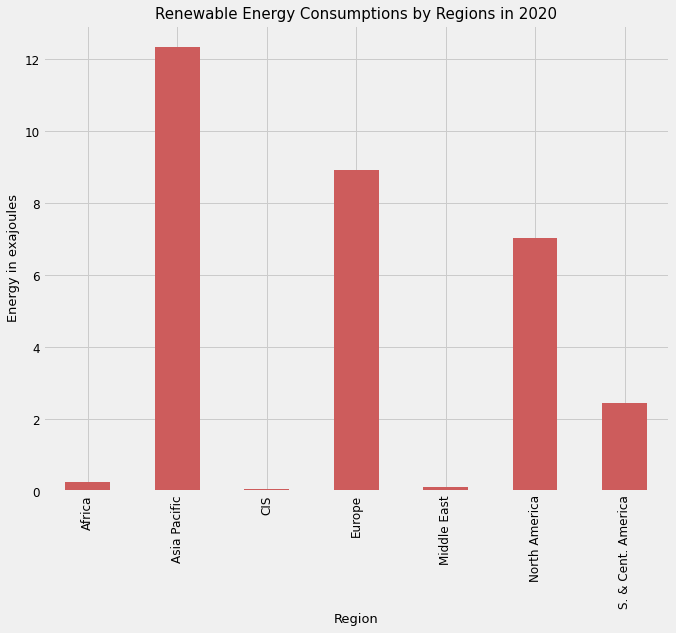

In [49]:
year2020RegionalRenEnConsumption=year2020RegionEmmission['renewables_ej'].sum()
year2020RegionalRenEnConsumption.plot(kind='bar',figsize=(10,8),fontsize=12,color="IndianRed");
plt.ylabel('Energy in exajoules',fontsize=13);
plt.xlabel('Region',fontsize=13)
plt.title('Renewable Energy Consumptions by Regions in 2020',fontsize=15);

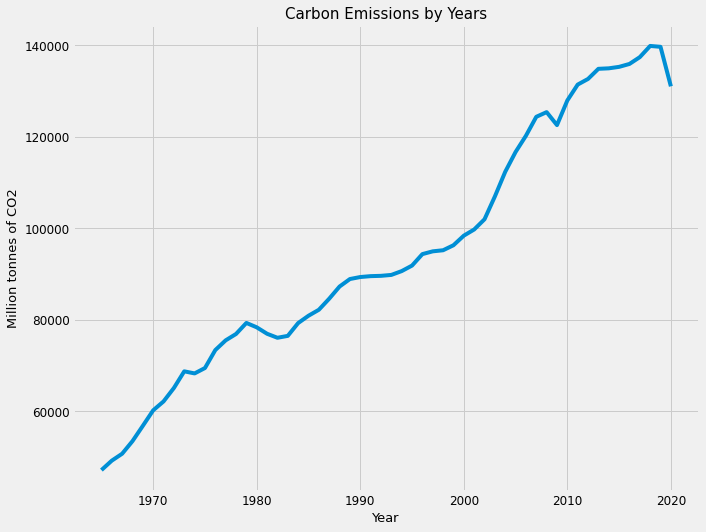

In [50]:
#What could be the reason of sudden fall of CO2 emmission in 2020 
#Could the Covid-19 pandemic has affected it?
yearsGrouped=df_bp_energy_cleaned.groupby('Year')
yearsGroupedCarbonEmmission=yearsGrouped['co2_mtco2'].sum()
#yearsGroupedCarbonEmmission
yearsGroupedCarbonEmmission.plot(figsize=(10,8),fontsize=12)
plt.ylabel('Million tonnes of CO2',fontsize=13);
plt.xlabel('Year',fontsize=13)
plt.style.use("fivethirtyeight")
plt.title('Carbon Emissions by Years',fontsize=15);
plt.show()


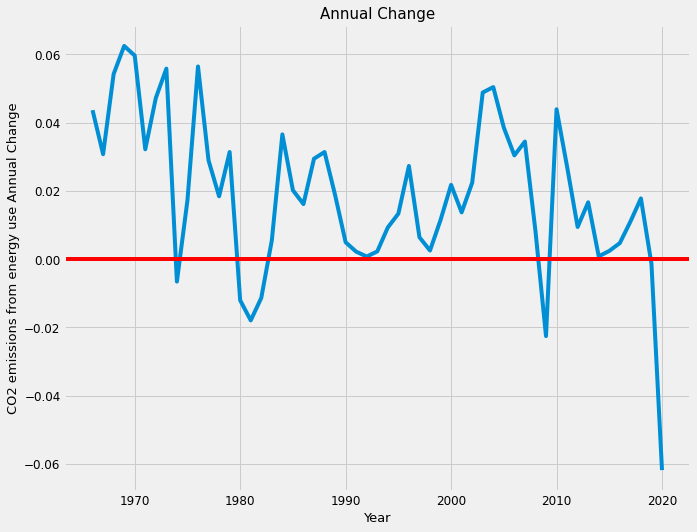

In [51]:
#yearsGrouped=df_bp_energy_cleaned.groupby('Year')
yearsGroupedCarbonEmmission=yearsGrouped['co2_mtco2'].sum()
yearsGroupedCarbonEmmissionChangePercentage=yearsGroupedCarbonEmmission.pct_change()
#yearsGroupedCarbonEmmission
yearsGroupedCarbonEmmissionChangePercentage.plot(figsize=(10,8),fontsize=12)
plt.ylabel('CO2 emissions from energy use Annual Change',fontsize=13);
plt.xlabel('Year',fontsize=13)
plt.title('Annual Change',fontsize=15)
plt.style.use("fivethirtyeight")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()


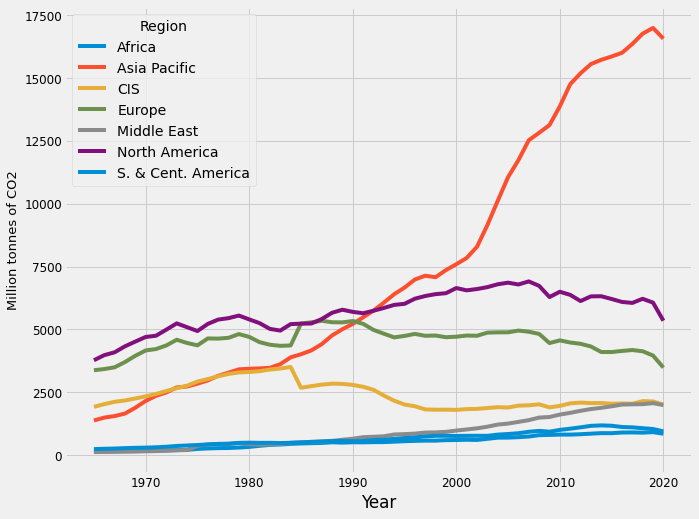

In [52]:
from pandas.core.frame import DataFrame

regions_bp_energy=df_bp_energy_cleaned.groupby(["Year","Region"])['co2_mtco2'].sum()

tabular_regions_bp_energy=regions_bp_energy.unstack()
tabular_regions_bp_energy.plot(figsize=(10,8),fontsize=12)
plt.ylabel('Million tonnes of CO2',fontsize=13);

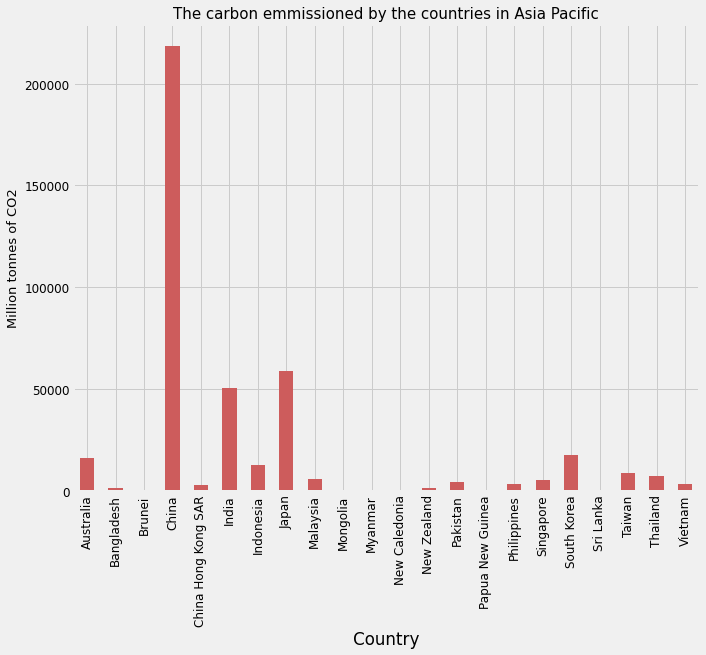

In [53]:
df_asia_pacific=df_bp_energy_cleaned[df_bp_energy_cleaned['Region']=='Asia Pacific'].groupby('Country')['co2_mtco2'].sum()
df_asia_pacific.plot(kind='bar',figsize=(10,8),fontsize=12,color="IndianRed");
plt.title("The carbon emmissioned by the countries in Asia Pacific",fontsize=15)
plt.ylabel('Million tonnes of CO2',fontsize=13);

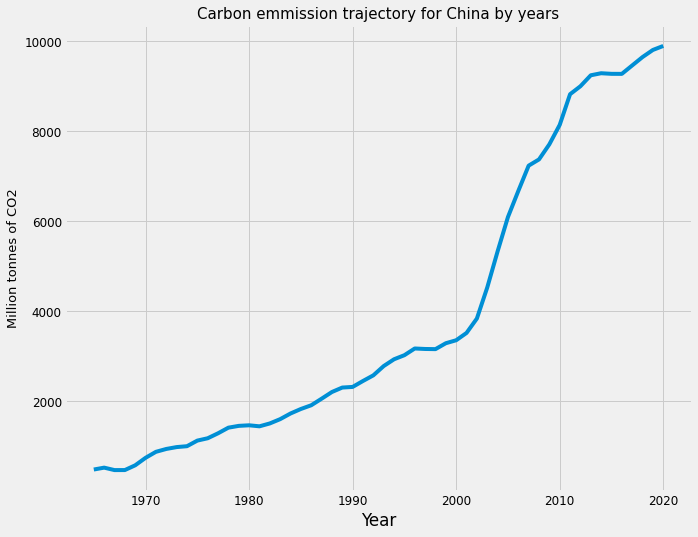

In [54]:
df_china=df_bp_energy_cleaned[df_bp_energy_cleaned['Country']=='China'].groupby('Year')['co2_mtco2'].sum()

df_china.plot(figsize=(10,8),fontsize=12)
plt.title("Carbon emmission trajectory for China by years", fontsize=15)
plt.ylabel('Million tonnes of CO2',fontsize=13);

In [55]:
df_bp_energy_no2020=df_bp_energy_cleaned[df_bp_energy_cleaned.Year != 2020]

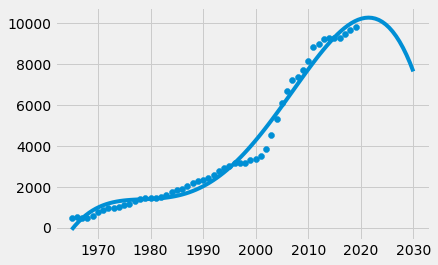

In [56]:
df_bp_energy_no2020=df_bp_energy_cleaned[df_bp_energy_cleaned.Year != 2020]

ddf=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='China']

china_years=ddf['Year']

china_co2_emmissions=ddf['co2_mtco2']

mymodel = Polynomial.fit(china_years, china_co2_emmissions, 4)

myline = np.linspace(1965, 2030, 100)

plt.scatter(china_years, china_co2_emmissions)
plt.plot(myline, mymodel(myline))
plt.show()


In [57]:
ddf1990=ddf[ddf.Year>1980]
china_years1990=china_years[china_years>1980]
ddf['co2_rnwen']=ddf.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
ddf1990['co2_rnwen']=ddf1990.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)

china_en_sum=ddf['co2_rnwen']
china_en_sum1990=ddf1990['co2_rnwen']

mymodel_china = Polynomial.fit(china_years1990, china_en_sum1990, 3)

myline_china = np.linspace(1980, 2050, 100)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [58]:
ddf_turkey=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='Turkey']

turkey_years=ddf_turkey['Year']

ddf_turkey['co2_rnwen']=ddf_turkey.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
turkey_en_sum=ddf_turkey['co2_rnwen']

mymodel_tr = Polynomial.fit(turkey_years, turkey_en_sum, 2)

myline_tr = np.linspace(1965, 2050, 100)

In [59]:
ddf_india=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='India']

india_years=ddf_india['Year']


ddf_india['co2_rnwen']=ddf_india.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
india_en_sum=ddf_india['co2_rnwen']

mymodel_india = Polynomial.fit(india_years, india_en_sum, 2)

myline_india = np.linspace(1965, 2050, 100)

In [60]:
ddf_US=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='US']

US_years=ddf_US['Year']


ddf_US['co2_rnwen']=ddf_US.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
US_en_sum=ddf_US['co2_rnwen']

mymodel_us = Polynomial.fit(US_years, US_en_sum, 3)

myline_us = np.linspace(1965, 2050, 100)

In [61]:
ddf_frn=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='France']

frn_years=ddf_frn['Year']


ddf_frn['co2_rnwen']=ddf_frn.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
frn_en_sum=ddf_frn['co2_rnwen']

mymodel_fr = Polynomial.fit(frn_years, frn_en_sum, 2)

myline_fr = np.linspace(1965, 2050, 100)

In [62]:
ddf_korea=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='South Korea']

korea_years=ddf_korea['Year']


ddf_korea['co2_rnwen']=ddf_korea.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
korea_en_sum=ddf_korea['co2_rnwen']

mymodel_korea = Polynomial.fit(korea_years, korea_en_sum,3)

myline_korea = np.linspace(1965, 2050, 100)

In [63]:
ddf_spa=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='Spain']

spa_years=ddf_spa['Year']


ddf_spa['co2_rnwen']=ddf_spa.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
spa_en_sum=ddf_spa['co2_rnwen']

mymodel_sp = Polynomial.fit(spa_years, spa_en_sum, 3)

myline_sp = np.linspace(1965, 2050, 100)

In [64]:
ddf_jap=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='Japan']

jap_years=ddf_jap['Year']


ddf_jap['co2_rnwen']=ddf_jap.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
jap_en_sum=ddf_jap['co2_rnwen']

mymodel_jp = Polynomial.fit(jap_years, jap_en_sum, 3)

myline_jp = np.linspace(1965, 2050, 100)

In [65]:
ddf_ger=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='Germany']

ger_years=ddf_ger['Year']


ddf_ger['co2_rnwen']=ddf_ger.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
ger_en_sum=ddf_ger['co2_rnwen']

mymodel_ger = Polynomial.fit(ger_years, ger_en_sum, 2)

myline_ger = np.linspace(1965, 2050, 100)

In [66]:
ddf_rus=df_bp_energy_no2020[df_bp_energy_no2020['Country']=='Russian Federation']
ddf_rus=ddf_rus[ddf_rus.Year>1984]
rus_years=ddf_rus['Year']

ddf_rus['co2_rnwen']=ddf_rus.apply(lambda x: (x['renewables_ej']+x['co2_mtco2_ej']-x['ren_power_pro_ej']),axis=1)
rus_en_sum=ddf_rus['co2_rnwen']

mymodel_rus = Polynomial.fit(rus_years,rus_en_sum, 3)

myline_rus = np.linspace(1985, 2050, 100)

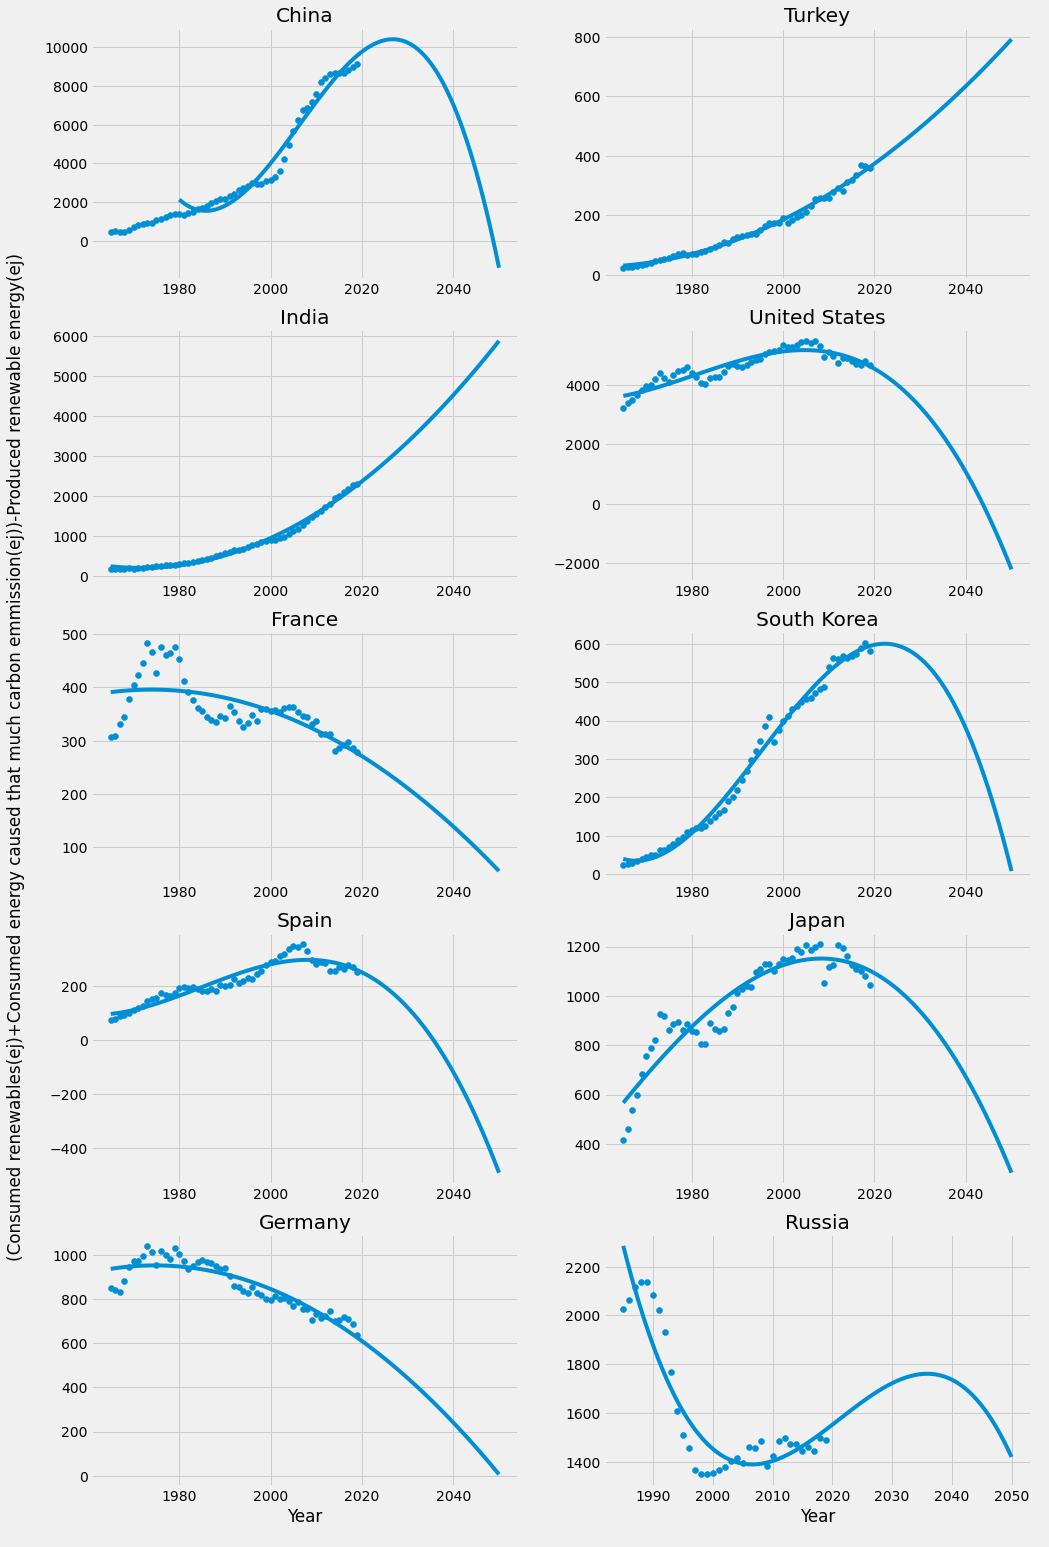

In [67]:
figure, axis = plt.subplots(5, 2, figsize=(15,25))
figure.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", pad=40, bottom=False, left=False,grid_color='none')

axis[0, 0].scatter(china_years, china_en_sum)
axis[0, 0].plot(myline_china, mymodel_china(myline_china))
axis[0, 0].set_title("China")

axis[0, 1].scatter(turkey_years, turkey_en_sum)
axis[0, 1].plot(myline_tr, mymodel_tr(myline_tr))
axis[0, 1].set_title("Turkey")

axis[1, 0].scatter(india_years, india_en_sum)
axis[1, 0].plot(myline_india, mymodel_india(myline_india))
axis[1, 0].set_title("India")

axis[1, 1].scatter(US_years, US_en_sum)
axis[1, 1].plot(myline_us, mymodel_us(myline_us))
axis[1, 1].set_title("United States")

axis[2, 0].scatter(frn_years, frn_en_sum)
axis[2, 0].plot(myline_fr, mymodel_fr(myline_fr))
axis[2, 0].set_title("France")

axis[2, 1].scatter(korea_years, korea_en_sum)
axis[2, 1].plot(myline_korea, mymodel_korea(myline_korea))
axis[2, 1].set_title("South Korea")

axis[3, 0].scatter(spa_years, spa_en_sum)
axis[3, 0].plot(myline_sp, mymodel_sp(myline_sp))
axis[3, 0].set_title("Spain")

axis[3, 1].scatter(jap_years, jap_en_sum)
axis[3, 1].plot(myline_jp, mymodel_jp(myline_jp))
axis[3, 1].set_title("Japan")

axis[4, 0].scatter(ger_years, ger_en_sum)
axis[4, 0].plot(myline_ger, mymodel_ger(myline_ger))
axis[4, 0].set_title("Germany")

axis[4, 1].scatter(rus_years, rus_en_sum)
axis[4, 1].plot(myline_rus, mymodel_rus(myline_rus))
axis[4, 1].set_title("Russia")

plt.setp(axis[-1, :], xlabel="Year")
plt.ylabel("(Consumed renewables(ej)+Consumed energy caused that much carbon emmission(ej))-Produced renewable energy(ej)")
plt.show()

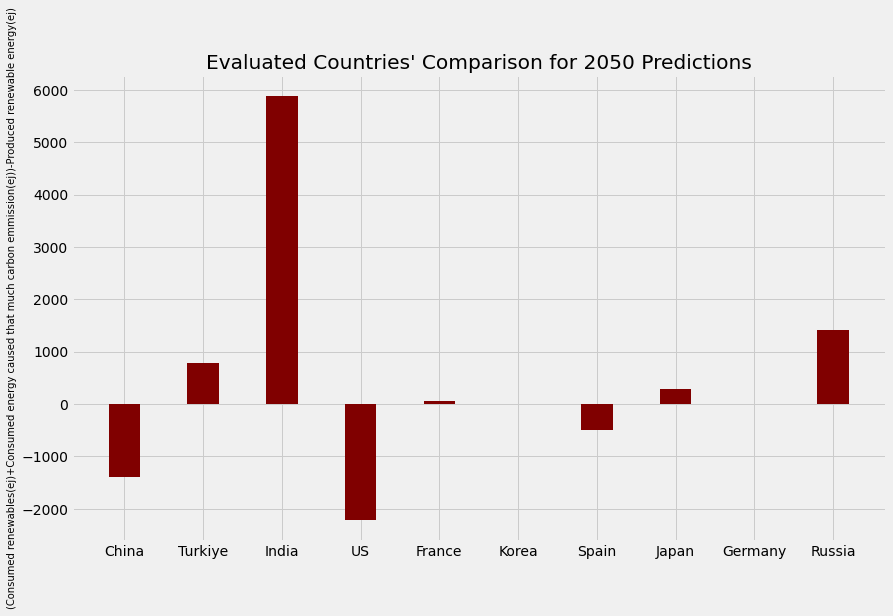

In [68]:
countries=np.array(['China','Turkiye','India','US','France','Korea','Spain','Japan','Germany','Russia'])
preds_2050=[]
x = np.array([2050]).reshape((-1, 1))

y_pred_china=mymodel_china(x)
preds_2050.append(float(y_pred_china[0]))

y_pred_tr=mymodel_tr(x)
preds_2050.append(float(y_pred_tr[0]))

y_pred_india=mymodel_india(x)
preds_2050.append(float(y_pred_india[0]))

y_pred_us=mymodel_us(x)
preds_2050.append(float(y_pred_us[0]))

y_pred_fr=mymodel_fr(x)
preds_2050.append(float(y_pred_fr[0]))

y_pred_korea=mymodel_korea(x)
preds_2050.append(float(y_pred_korea[0]))

y_pred_sp=mymodel_sp(x)
preds_2050.append(float(y_pred_sp[0]))

y_pred_jp=mymodel_jp(x)
preds_2050.append(float(y_pred_jp[0]))

y_pred_ger=mymodel_ger(x)
preds_2050.append(float(y_pred_ger[0]))

y_pred_rus=mymodel_rus(x)
preds_2050.append(float(y_pred_rus[0]))

preds={'China':y_pred_china,'Turkiye':y_pred_tr,'India':y_pred_india,'US':y_pred_us,'France':y_pred_fr,
       'Korea':y_pred_korea,'Spain':y_pred_sp,'Japan':y_pred_jp,'Germany':y_pred_ger,'Russia':y_pred_rus}

fig = plt.figure(figsize = (13, 8))
plt.bar(countries, preds_2050, color ='maroon', width = 0.4)
plt.title("Evaluated Countries' Comparison for 2050 Predictions")
plt.ylabel("(Consumed renewables(ej)+Consumed energy caused that much carbon emmission(ej))-Produced renewable energy(ej)",fontsize=10)
plt.show()